In [11]:
import requests   # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs # Beautifulsoup is for web scrapping...used to scrap specific content 
import re 
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ISHIKA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
# creating empty reviews list
echo_reviews=[]

# Extracting reviews from Amazon website
for i in range(1,20):
  ip=[]  


url = 'https://www.amazon.in/All-new-Echo-Dot-with-clock/product-reviews/B085M5R82K/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'
response = requests.get(url)
soup = bs(response.content,"html.parser")# creating soup object to iterate over the extracted content 
reviews = soup.findAll("span",attrs={"class","a-size-base review-text review-text-content"})
for i in range(len(reviews)):
    ip.append(reviews[i].text)  
    echo_reviews=echo_reviews+ip

# writng reviews in a text file 
with open("echo.txt","w",encoding='utf8') as output:
    output.write(str(echo_reviews))


In [13]:
echo_reviews

['\nUnderstands almost everything in english and Hindi. For many things you need to activate additional apps in alexa app. I had a echo 2nd generation earlier, and choose dot for its compact size.Pros: 1. It has room filing sound, i never have to use the max volume except when i am playing songs. The bass in not much, the app should have music equalizers. This is expected from front firing speakers.2. The mic hear from all corners of room, you have be normal loud, you cant whisper from a corner of room.3. It is more responsive and almost answers all weird questions from my child.Cons: Bass could be betterI am yet to pair it with my sound system and my smart tv, will update review later\n',
 '\nUnderstands almost everything in english and Hindi. For many things you need to activate additional apps in alexa app. I had a echo 2nd generation earlier, and choose dot for its compact size.Pros: 1. It has room filing sound, i never have to use the max volume except when i am playing songs. The

In [14]:
 # Joinining all the reviews into single paragraph 
ip_rev_string = " ".join(echo_reviews)

In [15]:
# Removing unwanted symbols incase if exists
ip_rev_string = re.sub("[^A-Za-z" "]+"," ",ip_rev_string).lower()
ip_rev_string = re.sub("[0-9" "]+"," ",ip_rev_string)

In [16]:
# words that contained in iphone 7 reviews
ip_reviews_words = ip_rev_string.split(" ")
print(ip_reviews_words)
# stop_words = stopwords.words('english')

['', 'understands', 'almost', 'everything', 'in', 'english', 'and', 'hindi', 'for', 'many', 'things', 'you', 'need', 'to', 'activate', 'additional', 'apps', 'in', 'alexa', 'app', 'i', 'had', 'a', 'echo', 'nd', 'generation', 'earlier', 'and', 'choose', 'dot', 'for', 'its', 'compact', 'size', 'pros', 'it', 'has', 'room', 'filing', 'sound', 'i', 'never', 'have', 'to', 'use', 'the', 'max', 'volume', 'except', 'when', 'i', 'am', 'playing', 'songs', 'the', 'bass', 'in', 'not', 'much', 'the', 'app', 'should', 'have', 'music', 'equalizers', 'this', 'is', 'expected', 'from', 'front', 'firing', 'speakers', 'the', 'mic', 'hear', 'from', 'all', 'corners', 'of', 'room', 'you', 'have', 'be', 'normal', 'loud', 'you', 'cant', 'whisper', 'from', 'a', 'corner', 'of', 'room', 'it', 'is', 'more', 'responsive', 'and', 'almost', 'answers', 'all', 'weird', 'questions', 'from', 'my', 'child', 'cons', 'bass', 'could', 'be', 'betteri', 'am', 'yet', 'to', 'pair', 'it', 'with', 'my', 'sound', 'system', 'and', 'my

In [17]:
import spacy
nlp=spacy.load('en_core_web_md')
one_block=echo_reviews[15]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [18]:
with open("D:\DATA SCIENCE\ASSIGNMENTS\Text Mining\stop.txt","r") as sw:
    stopwords = sw.read()

stopwords = stopwords.split("\n")

ip_reviews_words = [w for w in ip_reviews_words if not w in stopwords]

In [19]:
# Joinining all the reviews into single paragraph 
ip_rev_para = " ".join(ip_reviews_words)

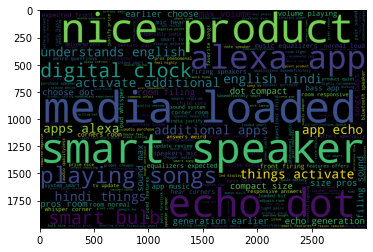

In [20]:
wordcloud_ip = WordCloud(
                      background_color='black',
    width=3000,height=2000
                     ).generate(ip_rev_para)

plt.imshow(wordcloud_ip)

In [21]:
# positive words # Choose the path for +ve words stored in system
with open("D:\DATA SCIENCE\ASSIGNMENTS\Text Mining\positive-words.txt","r") as pos:
  poswords = pos.read().split("\n")

In [22]:
# Choosing the only words which are present in positive words
ip_pos = " ".join ([w for w in ip_reviews_words if w in poswords])

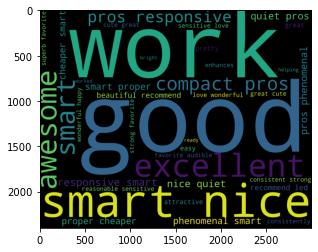

In [23]:
# Positive word cloud
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=3000,
                      height=2400
                     ).generate(ip_pos)

plt.imshow(wordcloud_pos)

In [25]:
# negative words  Choose path for -ve words stored in system
with open("D://DATA SCIENCE//ASSIGNMENTS//Text Mining//negative-words.txt","r") as neg:
  negwords = neg.read().split("\n")

In [26]:
# Choosing the only words which are present in negwords
ip_neg = " ".join ([w for w in ip_reviews_words if w in negwords])

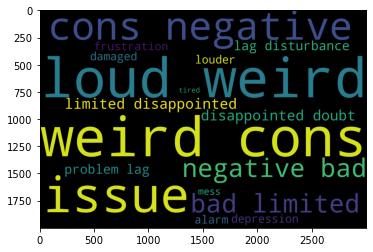

In [27]:
# negative word cloud
wordcloud_neg = WordCloud(
                      background_color='black',
                      width=3000,
                      height=2000
                     ).generate(ip_neg)

plt.imshow(wordcloud_neg)